# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn.FuzzyNetwork import FuzzyNetworkModel

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X_train.shape

(135, 4)

In [10]:
# OLD
fuzz = FuzzyNetworkModel(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=5, max_neurons=100,                 # initialization parameters
            )

Building Fuzzy Network with 5 neurons...
...Model successfully built!


In [11]:
# # NEW
# fuzz = FuzzyNetworkModel(
#             input_shape=(4,),          # data attributes
#             neurons=5, max_neurons=100,                 # initialization parameters
#             problem_type='classification',
#             )

In [12]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[ 2.0917330e-02,  2.7769532e-02, -4.9443651e-02,  4.1003887e-02,
         -2.7665818e-02],
        [ 2.8628077e-02, -2.4463629e-02, -2.0078588e-02,  1.6416658e-02,
         -1.9779552e-02],
        [ 4.8281182e-02, -7.0134290e-03,  2.1713410e-02, -3.4684457e-02,
         -1.4201127e-02],
        [-1.2535762e-02,  4.1570578e-02, -2.2450102e-02,  3.4347177e-06,
          2.9754546e-02]], dtype=float32),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32)]

In [16]:
fuzz.compile_model(init_c=True, init_s=True)

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Inputs (InputLayer)           │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 5)                 │              40 │ Inputs[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 5)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 5)                 │              25 │ Inputs[0][0],              │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[5.2, 7.2, 6.2, 4.7, 6.5],
        [3.4, 3.6, 2.9, 3.2, 3.2],
        [1.4, 6.1, 4.3, 1.3, 5.1],
        [0.2, 2.5, 1.3, 0.2, 2. ]], dtype=float32),
 array([[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]], dtype=float32)]

In [14]:
fuzz.compile_model()

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Inputs (InputLayer)           │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 5)                 │              40 │ Inputs[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 5)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 5)                 │              25 │ Inputs[0][0],              │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
# new
fuzz.model.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9646 - loss: 2.6592
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.9655 - loss: 2.4356
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9560 - loss: 2.6538
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9609 - loss: 2.7582
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9554 - loss: 2.5687
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9625 - loss: 2.3824
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9626 - loss: 2.4988
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9638 - loss: 2.3295
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9635 - loss: 2.2999
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9670 - loss: 2.4173


In [22]:
fuzz.get_layer_weights('FuzzyRules')

[array([[ 4.8103623 ,  7.380462  ,  4.9986954 ,  5.337106  ,  6.63039   ],
        [ 4.074869  ,  3.0573337 ,  4.4770894 ,  3.9057434 ,  2.3795989 ],
        [ 0.96374047,  6.6330743 ,  1.0540332 ,  0.9063372 ,  5.862875  ],
        [-0.32030314,  3.0879383 , -0.41428882, -0.27601182,  2.919965  ]],
       dtype=float32),
 array([[3.8035502, 3.8292346, 3.7867708, 3.8231812, 3.7711453],
        [3.3918102, 4.4164433, 3.4868684, 3.5458257, 3.1575134],
        [3.487329 , 3.4351277, 3.478059 , 3.5290222, 3.4207294],
        [3.3331237, 3.3178136, 3.3404155, 3.375707 , 3.30882  ]],
       dtype=float32)]

In [23]:
X_test

array([[5. , 2. , 3.5, 1. ],
       [7.7, 3.8, 6.7, 2.2],
       [6.8, 3. , 5.5, 2.1],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [7. , 3.2, 4.7, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [4.3, 3. , 1.1, 0.1],
       [6.5, 3. , 5.2, 2. ],
       [4.4, 3. , 1.3, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [4.8, 3.4, 1.6, 0.2]])

In [24]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [25]:
y_pred = fuzz.model.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [26]:
acc = y_test == y_pred.round()
acc

array([[ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [27]:
acc.sum() / acc.size

0.9555555555555556

## Model Prediction Results

In [27]:
pred_loss, pred_bin_acc = fuzz.model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - binary_accuracy: 0.8889 - loss: 1.6925
Model Loss: 1.69250405
Binary Accuracy: 88.9%


In [28]:
fuzz.model.metrics_names

['loss', 'compile_metrics']

## Plot Results

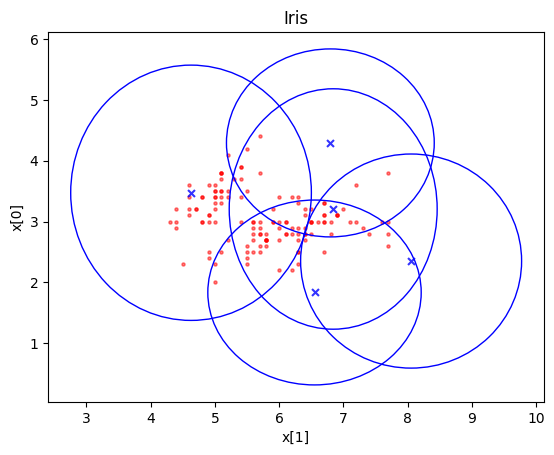

In [29]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()